# Filter *.h5 files & background correction
### Johanna Rahm, Sebastian Malkusch
#### Research group Heilemann
#### Institute for Physical and Theoretical Chemistry, Goethe University Frankfurt a.M.

## Load cell.h5 files

Choose/insert a directory for the cell files to be searched in (e.g. F:\Marburg\single_colour_tracking\resting). All *.h5 files in the directory will be loaded for the analysis.

In [1]:
from pySPT.widgets.widgetNotebooks import init_filter_notebook
from pySPT.widgets.widgetNotebooks import init_track_stats_widget_arrangement
from pySPT.widgets.widgetNotebooks import init_save_track_stats
from pySPT.widgets.widgetNotebooks import init_save_filtered_analysis
from pySPT.widgets import widgetLoadHdf5
from pySPT.widgets import loadHdf5
from pySPT.widgets import saveStatistics
from pySPT.widgets import saveFiltered
from pySPT.analysis import cell
from pySPT.analysis import trajectory
from pySPT.analysis import coverSlip
from pySPT.analysis import trajectoryStatistics
widget_load_hdf5 = widgetLoadHdf5.WidgetLoadHdf5()
load_hdf5 = loadHdf5.LoadHdf5()
cover_slip = coverSlip.CoverSlip()
track_stats = trajectoryStatistics.TrajectoryStatistics()
display(widget_load_hdf5.dir_box, widget_load_hdf5.dir_button)
widget_load_hdf5.dir_button.on_click(widget_load_hdf5.open_dir)
widget_load_hdf5.dir_box.observe(widget_load_hdf5.change_dir_box)

Text(value='directory to be searched in', description='directory', placeholder='Type something', style=Descrip…

Button(description='browse', style=ButtonStyle(), tooltip='browse for directory')

In [2]:
def initialize(event):
    init_filter_notebook(cover_slip, widget_load_hdf5, load_hdf5, is_cell=True)
    track_stats.cells = cover_slip.cells
    track_stats.cell_trajectories = cover_slip.cell_trajectories
    track_stats.cell_sizes = [cell.size for cell in cover_slip.cells]
    #track_stats.calc_min_rossier_length()
    #widget_load_hdf5.min_length = track_stats.tau_threshold_min_length
display(widget_load_hdf5.init_cells_button)
widget_load_hdf5.init_cells_button.on_click(initialize)

Button(description='initialize', style=ButtonStyle(), tooltip='initialize objects')

Initialization took 2.956427574157715 s


## Load background.h5 files

Choose/insert a directory for the background files to be searched in (e.g. F:\Marburg\single_colour_tracking\resting). All *.h5 files in the directory will be loaded for the analysis. Background correction is recommended but optional.

In [3]:
display(widget_load_hdf5.dir_box_bg, widget_load_hdf5.dir_button_bg)
widget_load_hdf5.dir_box_bg.observe(widget_load_hdf5.change_dir_box_bg)
widget_load_hdf5.dir_button_bg.on_click(widget_load_hdf5.open_dir_bg)

Text(value='directory to be searched in', description='directory', placeholder='Type something', style=Descrip…

Button(description='browse', style=ButtonStyle(), tooltip='browse for directory')

In [4]:
def initialize(event):
    init_filter_notebook(cover_slip, widget_load_hdf5, load_hdf5, is_cell=False)
    track_stats.backgrounds = cover_slip.backgrounds
    track_stats.background_trajectories = cover_slip.background_trajectories
    track_stats.bg_sizes = [background.size for background in cover_slip.backgrounds]
display(widget_load_hdf5.init_background_button)
widget_load_hdf5.init_background_button.on_click(initialize)

Button(description='initialize', style=ButtonStyle(), tooltip='initialize objects')

## Filter for parameters

Floating point numbers have to be separated with a dot (e.g. 2.123). If no filter parameters or invalid parameters are given, the min and max values will be set automatically. All boxes that are checked will be included in the filtered data. If one wants to filter multiple times, the JNB has to be restarted.

In [13]:
def filter(event):
    widget_load_hdf5.create_clear_output()
    track_stats.run_statistics(widget_load_hdf5.min_length_box.value, widget_load_hdf5.max_length_box.value, widget_load_hdf5.min_D_box.value, widget_load_hdf5.max_D_box.value, widget_load_hdf5.immob_type_check_box.value,  widget_load_hdf5.confined_type_check_box.value, widget_load_hdf5.free_type_check_box.value, widget_load_hdf5.analyse_successful_check_box.value, widget_load_hdf5.analyse_not_successful_check_box.value)
    track_stats.run_plot_diffusion_histogram(widget_load_hdf5.bin_size_box.value, plot=False)
#display(widget_load_hdf5.min_length_box, widget_load_hdf5.max_length_box, widget_load_hdf5.min_D_box, widget_load_hdf5.max_D_box, widget_load_hdf5.immob_type_check_box, widget_load_hdf5.confined_type_check_box, widget_load_hdf5.free_type_check_box, widget_load_hdf5.analyse_successful_check_box, widget_load_hdf5.analyse_not_successful_check_box, widget_load_hdf5.filter_button)
#widget_load_hdf5.min_length_box.observe(widget_load_hdf5.init_cells_button)
widget_load_hdf5.filter_button.on_click(filter)
init_track_stats_widget_arrangement(widget_load_hdf5.min_length_box, widget_load_hdf5.max_length_box, widget_load_hdf5.min_D_box, widget_load_hdf5.max_D_box, widget_load_hdf5.filter_button, widget_load_hdf5.immob_type_check_box, widget_load_hdf5.confined_type_check_box, widget_load_hdf5.free_type_check_box, widget_load_hdf5.analyse_successful_check_box, widget_load_hdf5.analyse_not_successful_check_box)

max trajectory length: 538
min trajectory length: 20
max diffusion coefficient: 2.4615554891102156 [μm²/s]
min diffusion coefficient: 1e-05 [μm²/s]
Filter for type determination successful only.
15.5 % are immobile
24.9 % are confined
59.7 % are free
Trajectories included: 181
Trajectories excluded: 318
cell types % [(15.254237288135593, 26.27118644067797, 58.47457627118644), (15.873015873015872, 22.22222222222222, 61.904761904761905)]
cell count [118, 63]
index [[4, 5, 6, 7, 9, 10, 11, 12, 14, 20, 21, 29, 30, 31, 37, 39, 40, 42, 43, 45, 51, 53, 57, 58, 60, 61, 62, 65, 68, 70, 71, 72, 76, 79, 81, 85, 86, 91, 93, 95, 96, 97, 100, 104, 105, 107, 109, 112, 115, 118, 119, 120, 127, 130, 134, 137, 138, 140, 144, 146, 147, 148, 151, 152, 158, 160, 166, 167, 170, 171, 173, 175, 176, 179, 181, 183, 184, 189, 190, 193, 195, 197, 199, 200, 202, 203, 205, 206, 207, 211, 212, 216, 217, 218, 221, 225, 226, 229, 230, 234, 237, 238, 240, 241, 243, 244, 246, 248, 258, 259, 264, 267, 270, 271, 273, 274

## Choose trajectory to plot

Choose a cell. If one wants to plot multiple times, choose a new cell and/or trajectory reload the plotting cell by clicking in the cell and pressing strg+enter.

In [6]:
def dropdown(event):
    widget_load_hdf5.cell_options = widget_load_hdf5.get_cell_names(cover_slip.cells, track_stats.cell_trajectories_filtered)
widget_load_hdf5.filter_button.on_click(dropdown)
display(widget_load_hdf5.drop_down_cells)

Dropdown(description='Number:', options=(), value=None)

Choose a trajectory.

In [7]:
def dropdown(event):      
    for cell in cover_slip.cells:
        if cell.name == widget_load_hdf5.drop_down_cells.value:
            target_cell = cover_slip.cells.index(cell)
            widget_load_hdf5.trajectory_options = track_stats.cell_trajectories_filtered_index[target_cell]
            widget_load_hdf5.drop_down_trajectories.options = widget_load_hdf5.trajectory_options
widget_load_hdf5.drop_down_cells.observe(dropdown)
widget_load_hdf5.filter_button.on_click(dropdown)
display(widget_load_hdf5.drop_down_trajectories)

Dropdown(description='Number:', options=(), value=None)

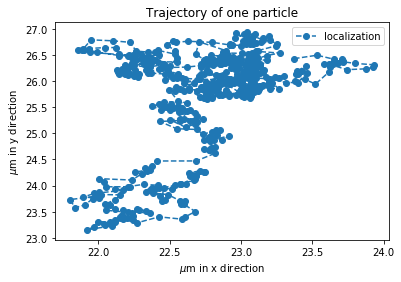

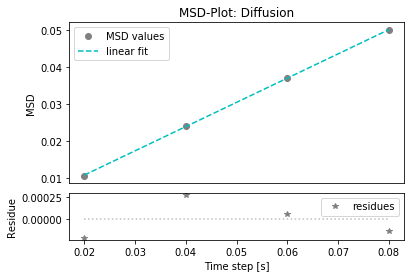

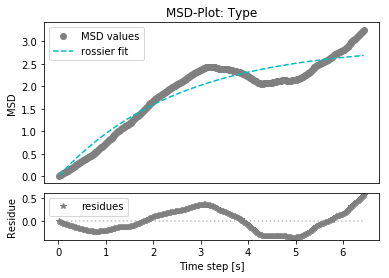

Number: 4
Trajectory length: 538
Diffusion coefficient: 0.163694012942073 μm²/s
MSD0: -0.002208726961100714 μm²
chi² linear fit: 7.43825296456454e-06 μm⁴
Type immobile: False
Analyse successful? True
chi² rossier fit: 10.087729850738155 μm⁴
Type confined: False
Type free: True
D_conf: 0.2880308717125164 μm²/s
r_conf: 1.479507368998463 μm
tau: 2.53322620350402 s
tau threshold: 0.12 s


In [8]:
def plot_trajectory(event):
    widget_load_hdf5.create_clear_output()
    cover_slip.plot_trajectory(widget_load_hdf5.drop_down_cells.value, widget_load_hdf5.drop_down_trajectories.value)
display(widget_load_hdf5.plot_button)
widget_load_hdf5.plot_button.on_click(plot_trajectory)

## Plot diffusion histogram

In [9]:
display(widget_load_hdf5.bin_size_box)

Text(value='0.1', description='bin size', placeholder='size for log10(D) histogram', style=DescriptionStyle(de…

In [10]:
def plot_diffusions(event):
    widget_load_hdf5.create_clear_output()
    track_stats.run_plot_diffusion_histogram(widget_load_hdf5.bin_size_box.value)
display(widget_load_hdf5.plot_diffusions_button)
widget_load_hdf5.plot_diffusions_button.on_click(plot_diffusions)

Button(description='plot', style=ButtonStyle(), tooltip='plot diffusion coefficients')

## Save Analysis

Choose a directory and a name for the statistics h5 file. If you want to save the filtered dataset, check the box.

In [11]:
display(widget_load_hdf5.save_dir_button, widget_load_hdf5.save_dir_box, widget_load_hdf5.save_name_box, widget_load_hdf5.filtered_dataset_checkbox)
widget_load_hdf5.save_dir_button.on_click(widget_load_hdf5.save_open_dir)
widget_load_hdf5.save_dir_box.observe(widget_load_hdf5.change_save_dir_box)

Button(description='browse', style=ButtonStyle(), tooltip='browse for directory')

Text(value='directory for statistics file', description='directory', placeholder='Type something', style=Descr…

Text(value='statistics', description='file name', placeholder='name for statistics .h5 file', style=Descriptio…

Checkbox(value=True, description='Save filtered dataset')

In [12]:
from tqdm import tqdm_notebook as tqdm
def save(event):
    h5_stats = saveStatistics.SaveStatistics()
    init_save_track_stats(h5_stats, track_stats, widget_load_hdf5.save_dir_box.value, widget_load_hdf5.save_name_box.value)
    if widget_load_hdf5.filtered_dataset_checkbox.value:
        for cell_index in tqdm(range(len(track_stats.cells))):
            if track_stats.cell_trajectories_filtered[cell_index]:
                h5_filtered = saveFiltered.SaveFiltered()
                init_save_filtered_analysis(h5_filtered, cover_slip, cell_index, track_stats, widget_load_hdf5.save_dir_box.value)
display(widget_load_hdf5.save_button)
widget_load_hdf5.save_button.on_click(save)

Button(description='save', style=ButtonStyle(), tooltip='save statistics')